## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data understanding

In [106]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [107]:
kc_data= pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [108]:
#getting summary about the data
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21 columns:
* 6 categorical and 15 numerical columns. 
* it has as a total of 21597 rows, the columns  with a non null count of less than 21597 show existence of some missing values.


In [109]:
#getting general summary statistics  on the data
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see the mean, percentiles and standard deviations of the numerical columns in our kings county data

# Data Pre-processing

Involves  manipulation, dropping or cleaning of data before it is used in order to ensure or enhance performance.

# Identifying and dealing with missing values

In [110]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(kc_data)
missing_data
   

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


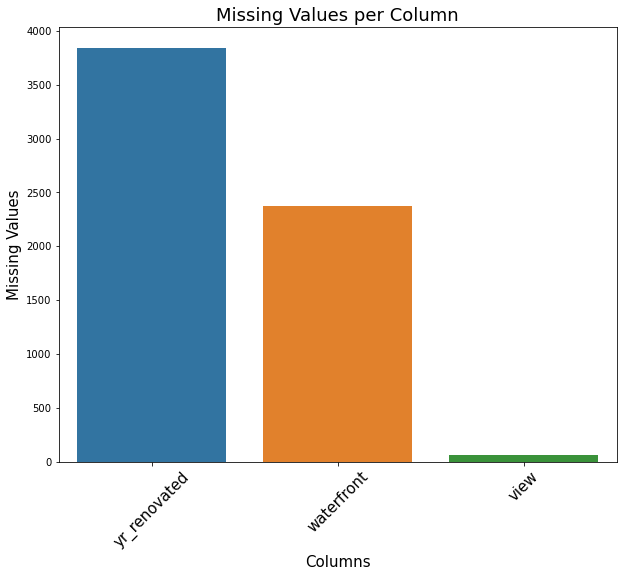

In [111]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = 45, fontsize =15)
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

* The threshold  on how to deal with missing values commonly used is 50% and also depends on the specific column. The percentages of missing values are very low  for the specific columns so we can replace. 
* The percentage of the missing values for waterfront column(11.00%), view column(0.29%) and year renovated column(17.70%) are less than 50% , so we can replace them.
* Checking the year renovated column we may assume the missing value is because the house was never renovated, maybe the house
did not have a view or a waterfront also for the other two columns hence we can Fill them with zeros.
* Since the missing values in the 3 columns are categorical and are a small percentage of the columns, replacing them with mode won`t skew the data nor give false conclusions

In [128]:
def filling_missing_values(data, columns):
    missing = missing_values(data) # store the output of missing_values function
    for col in columns:
        if col in missing.index: # check if column has missing values
            data[col] = data[col].fillna(data[col].mode()[0]) # fill missing values with mode
    return data
filling_missing_values(kc_data, ['waterfront','yr_renovated','view'])


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Duplicates

In [114]:
def check_duplicates(data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates(kc_data)


0

There are no duplicates in the data.

# Data inconsistencies

In [115]:
def print_value_counts(df):
    for column in df.columns:
        # Print the column name
        print("Value counts for {} column:".format(column))
        # Print the value counts for the column
        print(df[column].value_counts())
        # Add a separator for clarity
        print("="*30)

print_value_counts(kc_data)

Value counts for id column:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
Value counts for date column:
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
1/31/2015      1
3/8/2015       1
5/27/2015      1
7/27/2014      1
1/10/2015      1
Name: date, Length: 372, dtype: int64
Value counts for price column:
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
Value counts for bedrooms column:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value counts for bathrooms column:
2.50    5377
1.00    3851


* 10,11,33 bedrooms does not make sense
* 7 and 8 bathrooms looks like a wrong data entry
* 1.5,2.5 and 3.5 floors?
* The square foot basement column has a placeholder value of ?.

In [132]:
inconsistent_basement = kc_data[kc_data['sqft_basement'] == '?']
inconsistent_basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,7 Average,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,...,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,...,10 Very Good,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,...,7 Average,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,...,7 Average,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,...,7 Average,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NO,NONE,...,8 Good,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,...,7 Average,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [116]:
def find_inconsistent_data(df):
    # Identify potential data inconsistencies
    inconsistent_bedrooms = df[(df['bedrooms'] == 10) | (df['bedrooms'] == 11) | (df['bedrooms'] == 33)]
    inconsistent_bathrooms = df[(df['bathrooms'] == 7) | (df['bathrooms'] == 8)]
    inconsistent_floors = df[(df['floors'] == 1.5) | (df['floors'] == 2.5) | (df['floors'] == 3.5)]
    inconsistent_basement = df[df['sqft_basement'] == '?']
    
    # Concatenate the inconsistent data into a single DataFrame
    inconsistent_data = pd.concat([inconsistent_bedrooms, inconsistent_bathrooms, inconsistent_floors, inconsistent_basement])
    
    return inconsistent_data

In [133]:
inconsistent_data = find_inconsistent_data(kc_data)
inconsistent_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,...,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,...,7 Average,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,...,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,...,7 Average,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,...,7 Average,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NO,NONE,...,8 Good,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,...,7 Average,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [ ]:
kc_data['sqft_basement'].replace('?',0.0,regex=False,inplace=True)

* When the number of bedrooms is greater than 10, the value in the sqft_living and sqft_lot a too little to match to that record meaning there is most likely an error in data entry. Therefore it`s best drop that column

* It has 454 placeholder values, dropping the would mean loss of valuable data in the other columns
* The placeholder would have most likely have been used to show that the house has no basement, we can therefore replace these placeholder values with the mode ie 0
* The placeholder values constitute 2% of the column so imputing the data won't skew the data

# Outliers

In [118]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()


IQR for price column: 323000.0
Number of outliers in price column: 1158
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_above column: 1020.0
Number of outliers in sqft_above column: 610
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_living15 column: 870.0
Number of outliers in sqft_living15 column: 543
IQR for sqft_lot15 column: 4983.0
Number of outliers in sqft_lot15 column: 2188


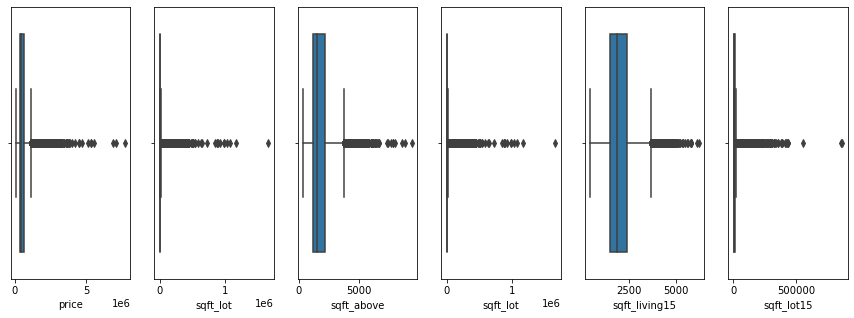

In [119]:
check_outliers(kc_data, ['price', 'sqft_lot', 'sqft_above','sqft_lot','sqft_living15','sqft_lot15'])


IQR for price column: 323000.0
Number of outliers in price column: 1158


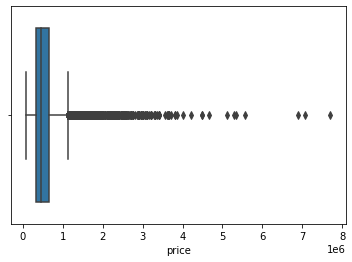

In [120]:
def check_outliers(data, column):
    # Use interquartile range (IQR) to find outliers for the specified column
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    print("IQR for {} column: {}".format(column, iqr))
    
    # Determine the outliers based on the IQR
    outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
    print("Number of outliers in {} column: {}".format(column, outliers.sum()))
    
    # Create a box plot to visualize the distribution of the specified column
    sns.boxplot(data=data, x=column)
check_outliers(kc_data,'price')

In [121]:
#checking for outliers
import matplotlib.pyplot as plt
def check_for_outliers(data, column):
    # Create a box plot of the column data
    plt.boxplot(data[column])
    plt.title("Box plot for {}".format(column))
    plt.show()

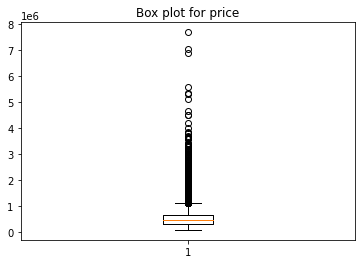

In [122]:
check_for_outliers(kc_data, 'price')

The data has outliers but we cannot eliminate the outliers because they actually provide valuable information

# Scaling

# 

In [ ]:
print ('square foot basement placeholder values ? constitute,',(454/21597)*100, '% of the entire column')

kc_data['sqft_basement'].replace('?',0.0,regex=False,inplace=True)
kc_data['sqft_basement'].value_counts()

In [ ]:
#changing the data type of the column because it contains numerical values
kc_data['sqft_basement']=kc_data['sqft_basement'].astype(float)


In [ ]:
#converting date column from categorical (object) to numerical (int64)
kc_data['date'] = pd.to_datetime(kc_data['date'], format='%m/%d/%Y')

# Extract the year and create a new column
kc_data['year'] = kc_data['date'].dt.year
kc_data.drop('date', axis=1, inplace=True)

In [ ]:
#creating new column age
kc_data['age']= kc_data['year']-kc_data['yr_built']
kc_data['age']

In [ ]:
#dropping the columns year, yr_built, id
kc_data.drop(['year','yr_built', 'id'],axis=1, inplace=True )

In [ ]:
kc_data.info()

The data doesn't have missing values, duplicates or placeholder values and all the columns are in their correct datatypes

Univariate EDA

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

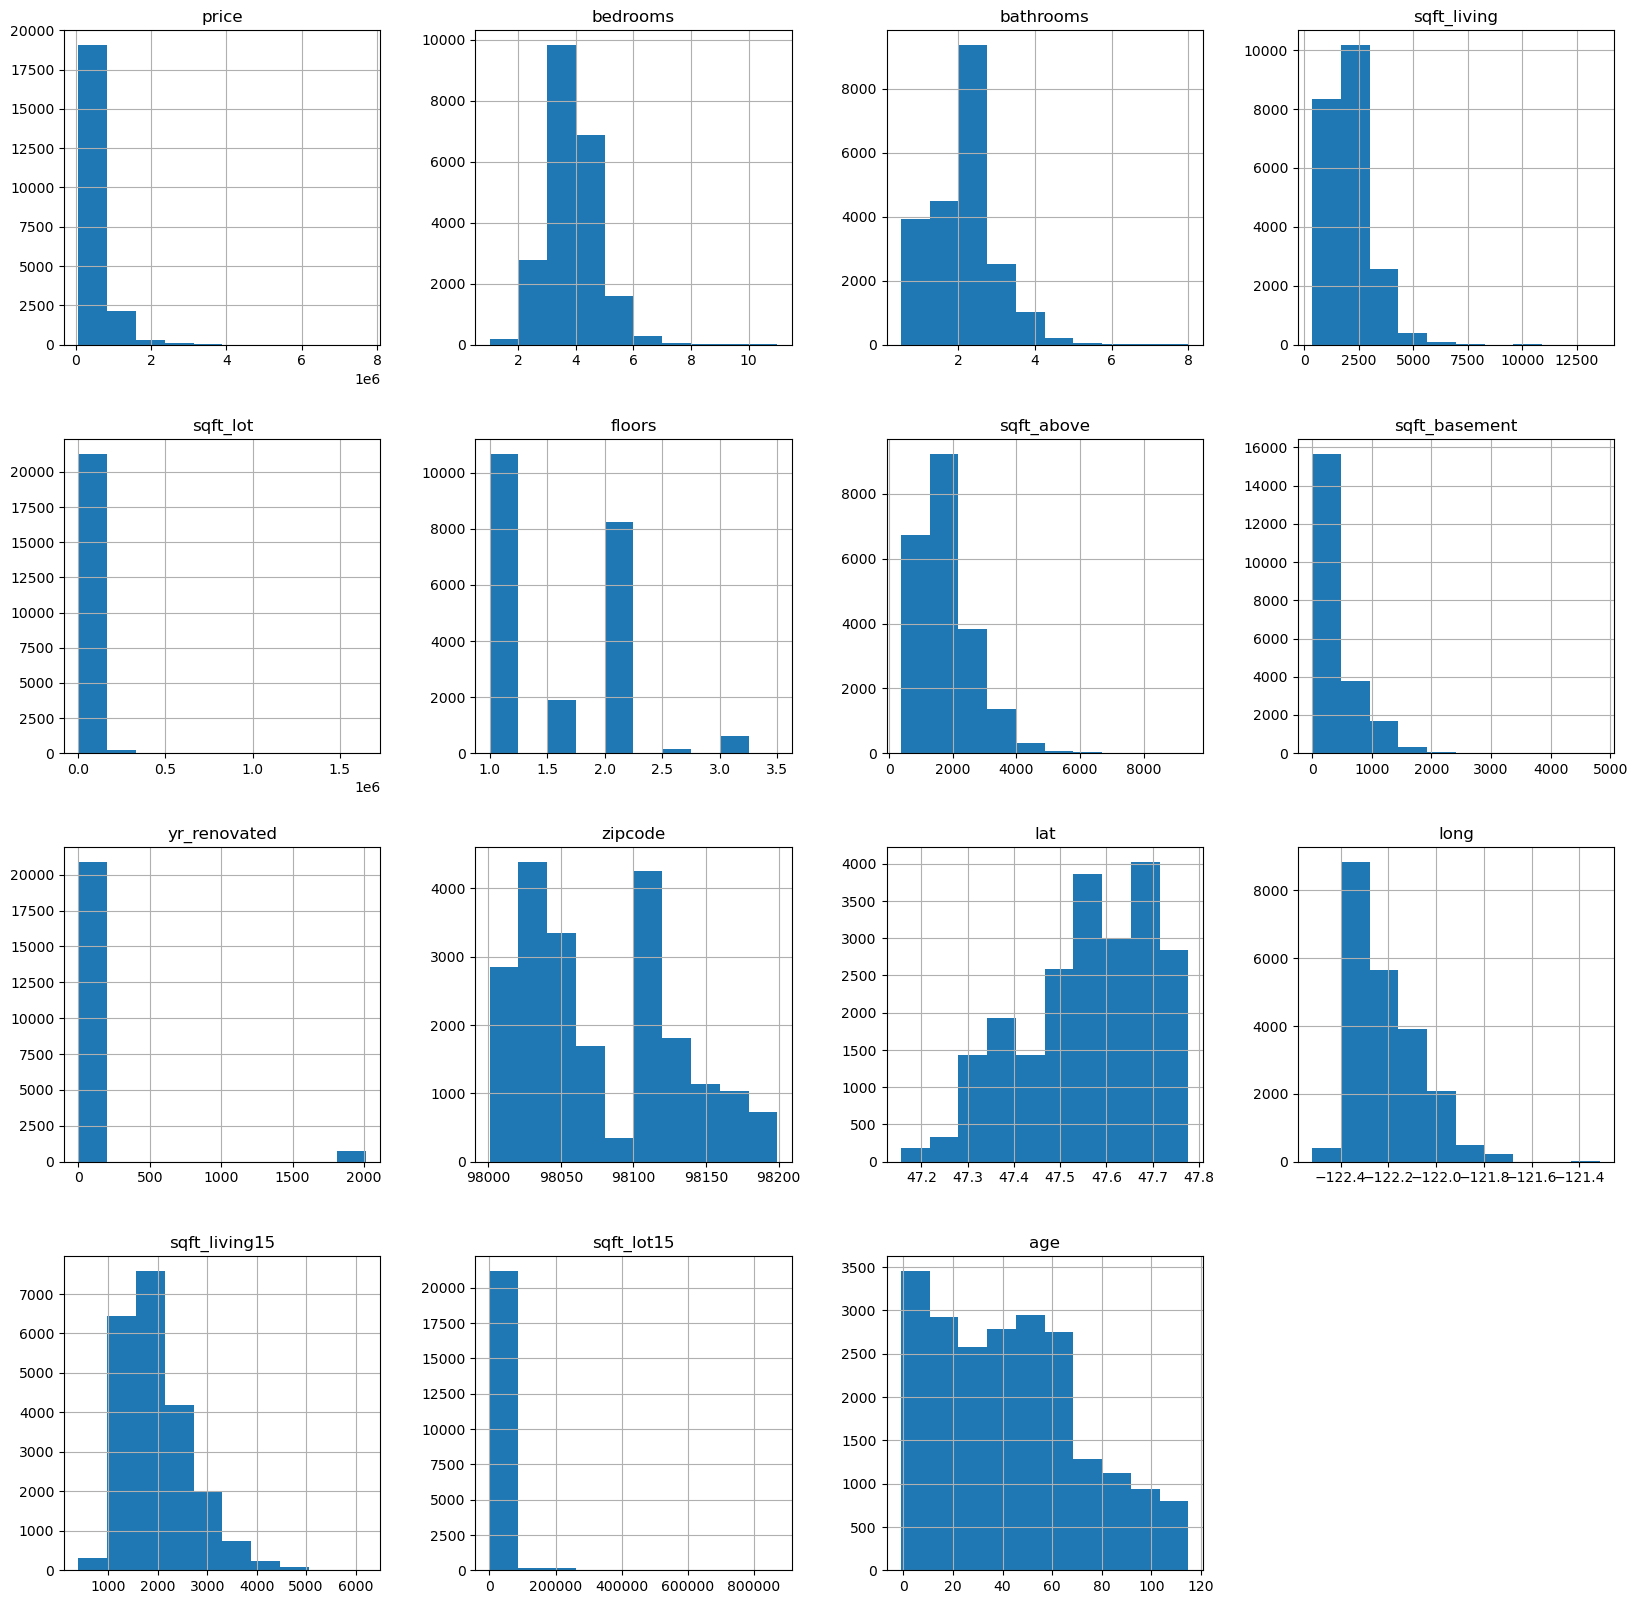

In [242]:
#columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
            #'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
kc_data.hist(figsize=(20,20))

Bivariate EDA

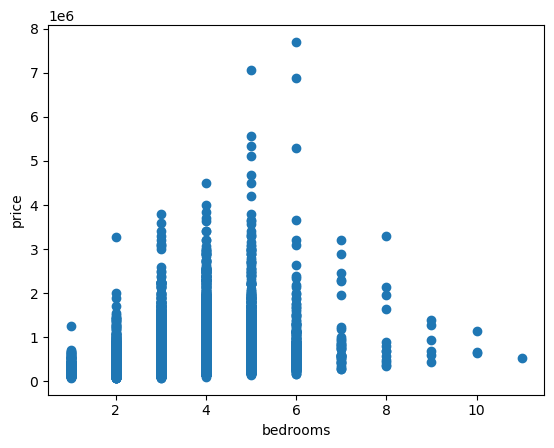

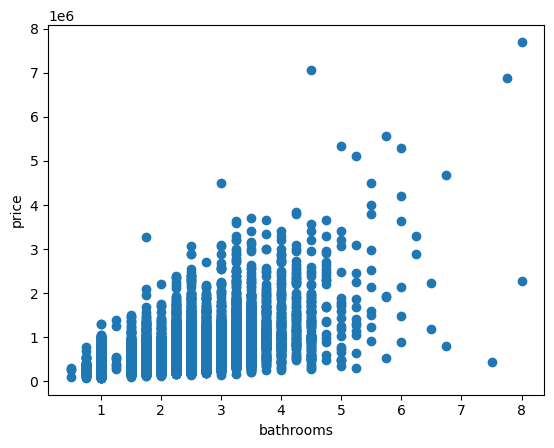

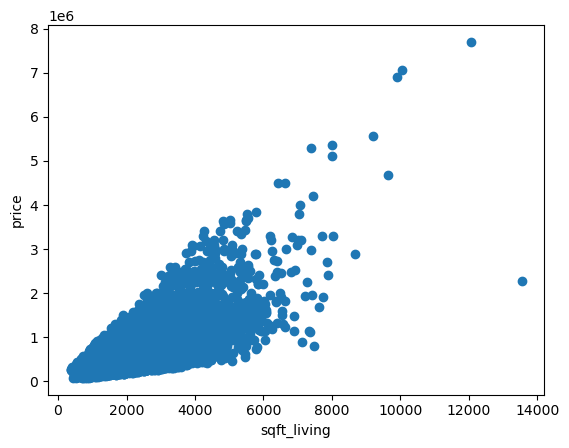

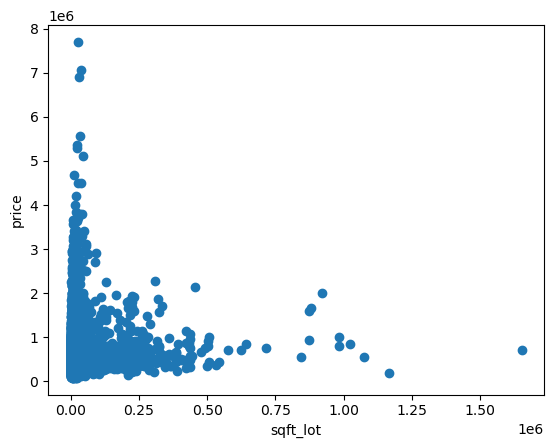

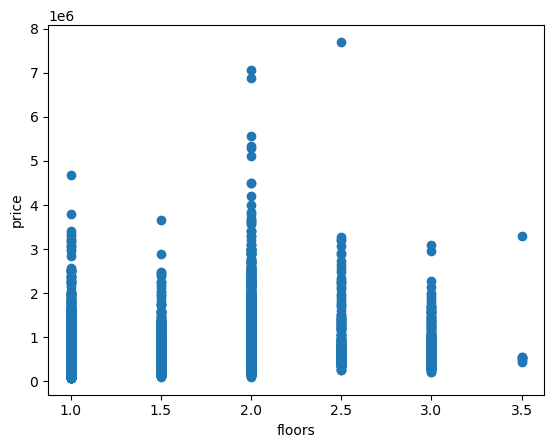

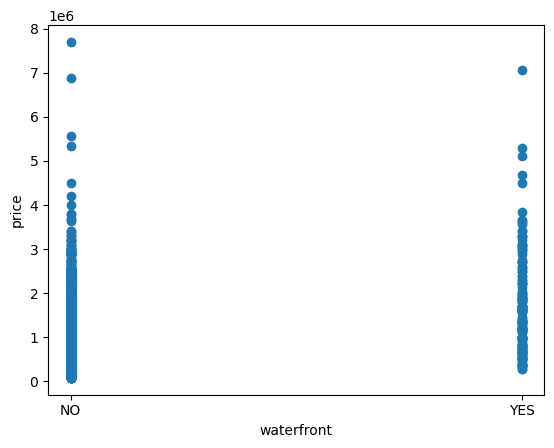

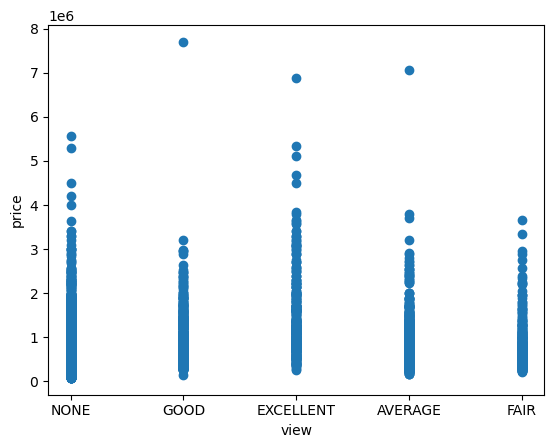

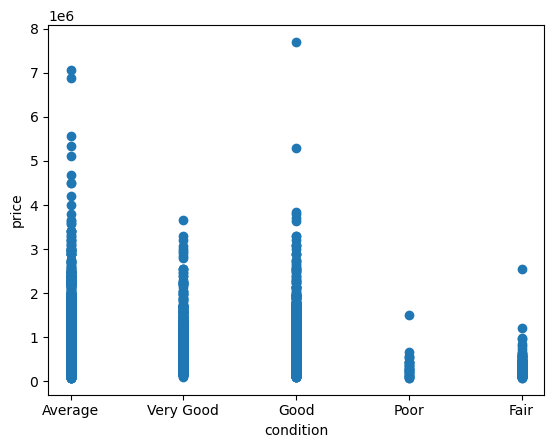

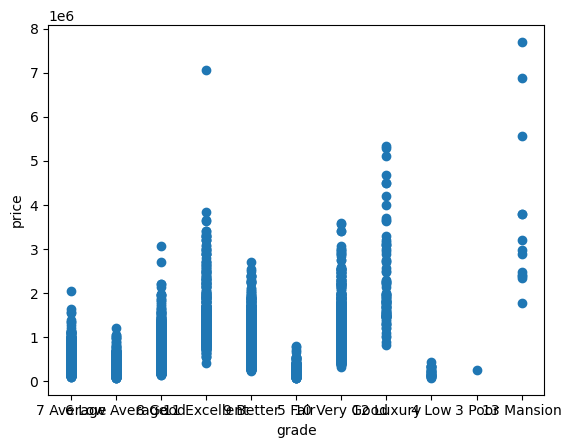

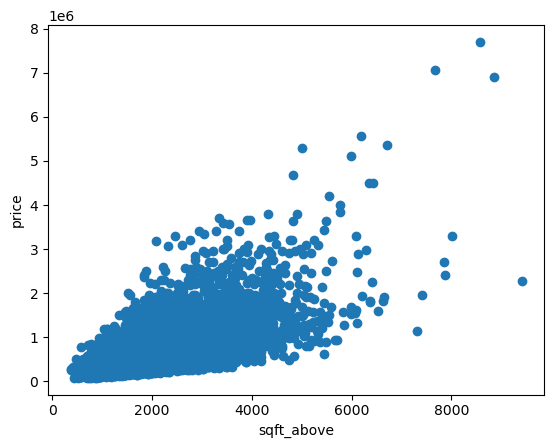

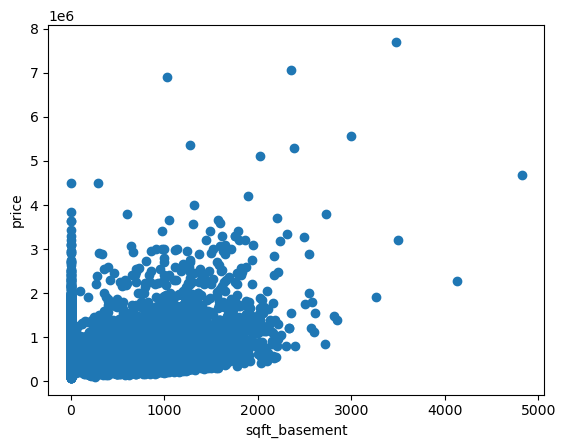

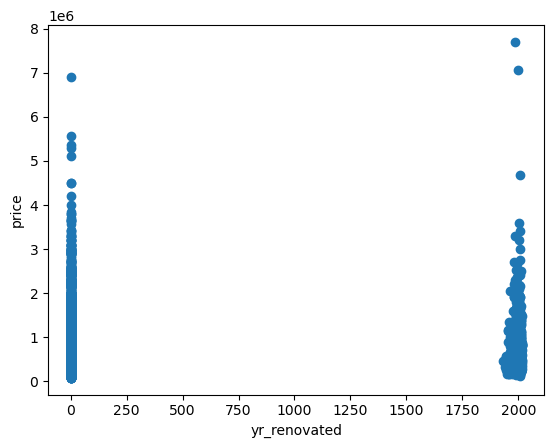

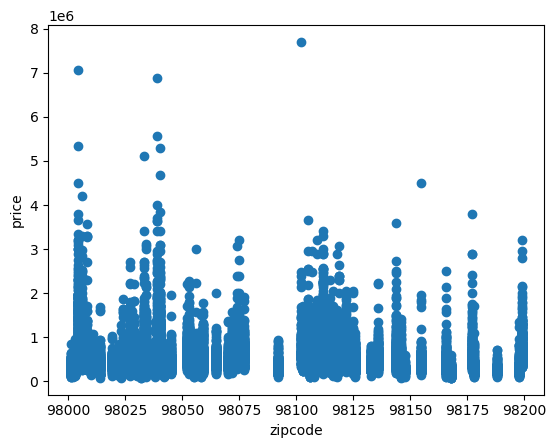

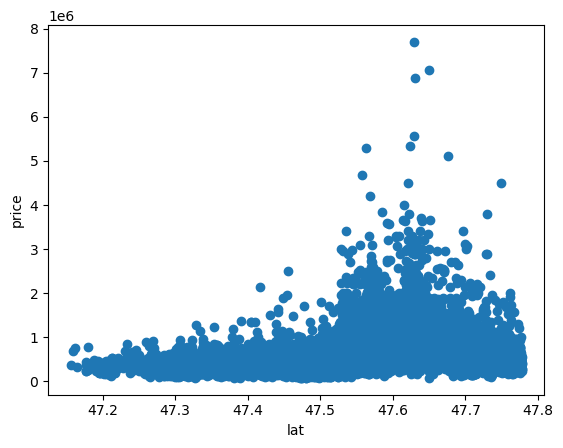

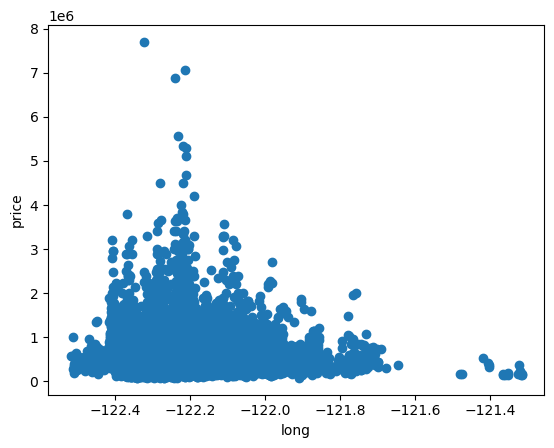

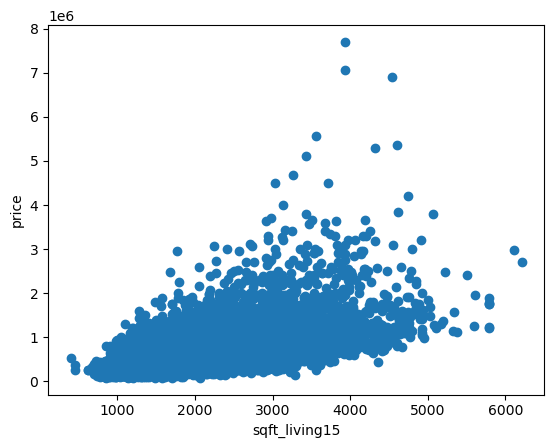

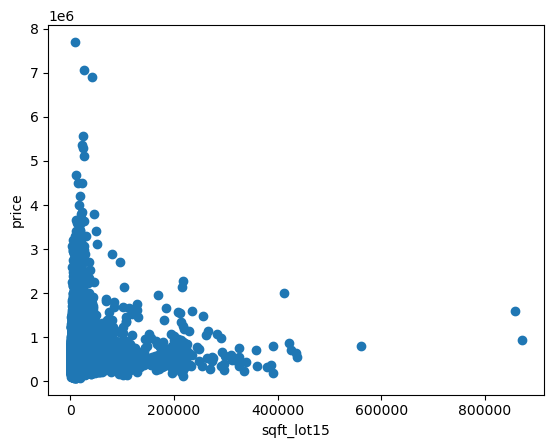

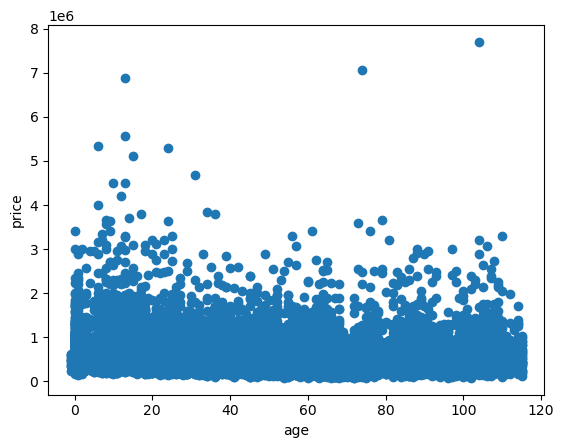

In [243]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

In [244]:
kc_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.605392,0.321103,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,-0.053901
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.492543,0.303517,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.160870
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.686664,0.278504,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.507553
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.876448,0.428683,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.318580
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.184134,0.015038,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.052846
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.523970,-0.241845,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.489497
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,1.000000,-0.051149,0.020637,-0.261557,-0.001160,0.344819,0.731756,0.195069,-0.424367
sqft_basement,0.321103,0.303517,0.278504,0.428683,0.015038,-0.241845,-0.051149,1.000000,0.065014,0.073257,0.109828,-0.142347,0.199324,0.015894,0.129816
yr_renovated,0.117858,0.018626,0.047173,0.051056,0.004977,0.003785,0.020637,0.065014,1.000000,0.062402,0.027979,-0.064551,0.000675,0.004283,0.202237
zipcode,-0.053409,-0.158588,-0.204778,-0.199793,-0.129582,-0.059522,-0.261557,0.073257,0.062402,1.000000,0.266729,-0.564253,-0.279286,-0.147288,0.347195


In [245]:
#fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
#plt.title('Correlation Matrix', fontsize=18)
#plt.show()

In [246]:
X = kc_data.drop(['price'], axis=1)
corr_matrix = X.corr()
corr_matrix
#threshold = 0.7
#high_correlation = np.where(np.abs(corr_matrix) > threshold)
#print(high_correlation)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
bedrooms,1.000000,0.527870,0.593178,0.033602,0.183707,0.492543,0.303517,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.160870
bathrooms,0.527870,1.000000,0.755755,0.088368,0.502574,0.686664,0.278504,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.507553
sqft_living,0.593178,0.755755,1.000000,0.173449,0.353941,0.876448,0.428683,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.318580
sqft_lot,0.033602,0.088368,0.173449,1.000000,-0.004824,0.184134,0.015038,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.052846
floors,0.183707,0.502574,0.353941,-0.004824,1.000000,0.523970,-0.241845,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.489497
sqft_above,0.492543,0.686664,0.876448,0.184134,0.523970,1.000000,-0.051149,0.020637,-0.261557,-0.001160,0.344819,0.731756,0.195069,-0.424367
sqft_basement,0.303517,0.278504,0.428683,0.015038,-0.241845,-0.051149,1.000000,0.065014,0.073257,0.109828,-0.142347,0.199324,0.015894,0.129816
yr_renovated,0.018626,0.047173,0.051056,0.004977,0.003785,0.020637,0.065014,1.000000,0.062402,0.027979,-0.064551,0.000675,0.004283,0.202237
zipcode,-0.158588,-0.204778,-0.199793,-0.129582,-0.059522,-0.261557,0.073257,0.062402,1.000000,0.266729,-0.564253,-0.279286,-0.147288,0.347195
lat,-0.011595,0.024301,0.052178,-0.085507,0.049280,-0.001160,0.109828,0.027979,0.266729,1.000000,-0.135340,0.048721,-0.086129,0.147869


In [247]:
df=kc_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous i
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_above)",0.876448
"(sqft_living15, sqft_living)",0.756400
"(sqft_living, sqft_living15)",0.756400
"(bathrooms, sqft_living)",0.755755
"(sqft_living, bathrooms)",0.755755


Dropping some columns due to multicollinearity

In [248]:
kc_data.drop(['sqft_above', 'sqft_living15', 'bathrooms'], axis=1, inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  object 
 6   view           21596 non-null  object 
 7   condition      21596 non-null  object 
 8   grade          21596 non-null  object 
 9   sqft_basement  21596 non-null  float64
 10  yr_renovated   21596 non-null  float64
 11  zipcode        21596 non-null  int64  
 12  lat            21596 non-null  float64
 13  long           21596 non-null  float64
 14  sqft_lot15     21596 non-null  int64  
 15  age            21596 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 2.8+ MB


Dropping some columns because they contain categorical values

In [249]:
#kc_data.drop(['waterfront', 'view', 'condition', 'yr_renovated'], axis=1, inplace=True)
#kc_data.info()

In [250]:
kc_data.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  object 
 6   view           21596 non-null  object 
 7   condition      21596 non-null  object 
 8   grade          21596 non-null  object 
 9   sqft_basement  21596 non-null  float64
 10  yr_renovated   21596 non-null  float64
 11  sqft_lot15     21596 non-null  int64  
 12  age            21596 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.3+ MB


In [251]:
kc_data['yr_renovated'] = kc_data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
kc_data['yr_renovated'].value_counts()

0    20852
1      744
Name: yr_renovated, dtype: int64

In [252]:
# Convert grade column to numeric using label encoding
label_encoder = LabelEncoder()
kc_data['grade'] = label_encoder.fit_transform(kc_data['grade'])
kc_data['grade'].value_counts()

8     8973
9     6065
10    2615
7     2038
0     1134
1      399
6      242
2       89
5       27
3       13
4        1
Name: grade, dtype: int64

In [253]:
label_encoder = LabelEncoder()
kc_data['view'] = label_encoder.fit_transform(kc_data['view'])
kc_data['view'].value_counts()

4    19484
0      957
3      508
2      330
1      317
Name: view, dtype: int64

In [254]:
label_encoder = LabelEncoder()
kc_data['condition'] = label_encoder.fit_transform(kc_data['condition'])
kc_data['condition'].value_counts()

0    14020
2     5677
4     1700
1      170
3       29
Name: condition, dtype: int64

In [255]:
label_encoder = LabelEncoder()
kc_data['waterfront'] = label_encoder.fit_transform(kc_data['waterfront'])
kc_data['waterfront'].value_counts()

0    21450
1      146
Name: waterfront, dtype: int64

In [256]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  int64  
 6   view           21596 non-null  int64  
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_basement  21596 non-null  float64
 10  yr_renovated   21596 non-null  int64  
 11  sqft_lot15     21596 non-null  int64  
 12  age            21596 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.3 MB


In [257]:
kc_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
sqft_basement    0.321103
bedrooms         0.315961
waterfront       0.264308
floors           0.256820
yr_renovated     0.117546
sqft_lot         0.089879
sqft_lot15       0.082849
condition        0.022218
age             -0.053901
view            -0.304731
grade           -0.366460
Name: price, dtype: float64

Linear Regression

In [258]:
X= kc_data[['sqft_living', 'bedrooms', 'sqft_basement', 'waterfront']]
y=kc_data['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6389.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:12:26   Log-Likelihood:            -2.9894e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.081e+04   6604.180     13.750      0.000    7.79e+04    1.04e+05
sqft_living     301.9101      2.434    124.027      0.000     297.139     306.681
bedrooms      -5.635e+04   2337.916    -24.102      0.000   -6.09e+04   -5.18e+04
sqft_basement    20.5012      4.273      4.798      0.000      12.127      28.876
waterfront     8.206e+05   2.09e+04     39.353      0.000     7.8e+05    8.61e+05
==============================================================================
Omnibus:                    12969.042   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388667.432
Skew:                           2.374   Prob(JB):                         0.00
Kurtosis:                      23.233   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
# predictors = kc_data[['sqft_living', 'bedrooms', 'sqft_basement', 'waterfront']]
# outcome = kc_data['price']
# house_lm = LinearRegression()
# fitted = house_lm.predict(kc_data[predictors])
# RMSE = np.sqrt(mean_squared_error(kc_data[outcome], fitted))
# r2 = r2_score(kc_data[outcome], fitted)
# print(f'RMSE: {RMSE:.0f}')
# print(f'r2: {r2:.4f}')

In [260]:
# fit the model to the training data
model = LinearRegression()
model.fit(X, y)

# predict the values of the dependent variable for the test set
y_pred = model.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 248602.67400581174


In [261]:
# X= kc_data[['sqft_living', 'bedrooms', 'sqft_basement', 'waterfront', 'floors', 'yr_renovated']]
# y=kc_data['price']
# model1=sm.OLS(y, sm.add_constant(X))
# results1=model1.fit(X, y)
# results1.summary()

X = kc_data[['sqft_living', 'bedrooms', 'sqft_basement', 'waterfront', 'floors', 'yr_renovated']]
y = kc_data['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4344.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:12:27   Log-Likelihood:            -2.9883e+05
No. Observations:               21596   AIC:                         5.977e+05
Df Residuals:                   21589   BIC:                         5.977e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.088e+04   7543.156      9.396

In [262]:
# fit the model to the training data
model1 = LinearRegression()
model1.fit(X, y)

# predict the values of the dependent variable for the test set
y_pred = model1.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 247271.03106101093


Backward selection

In [263]:
kc_data_copy = kc_data.copy() # make a copy of kc_data
X = kc_data_copy.drop('price', axis=1)
y = kc_data_copy['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2736.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:12:27   Log-Likelihood:            -2.9739e+05
No. Observations:               21596   AIC:                         5.948e+05
Df Residuals:                   21583   BIC:                         5.949e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.686e+05   1.35e+04     12.487

In [267]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)
  

          feature        VIF
0           const  73.477514
1        bedrooms   1.631399
2     sqft_living   2.923139
3        sqft_lot   2.078694
4          floors   1.715064
5      waterfront   1.069188
6            view   1.145946
7       condition   1.249954
8           grade   1.188634
9   sqft_basement   1.688251
10   yr_renovated   1.101261
11     sqft_lot15   2.102908
12            age   1.696370
